In [ ]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

import keras
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Dropout

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
data_dir_train = 'DailyDelhiClimateTrain.csv'
data_dir_test = 'DailyDelhiClimateTest.csv'
df_train = pd.read_csv(data_dir_train, parse_dates=['date'], index_col='date')
df_test = pd.read_csv(data_dir_test, parse_dates=['date'], index_col='date')

In [ ]:
# Display basic information
df_train.info()
df_test.info()
print(df_train.describe())
print(df_test.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114 entries, 2017-01-01 to 2017-04-24
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      114 non-null    float64
 1   humidity      114 non-null    float64
 2   wind_speed    114 non-null    float64
 3   meanpressure  114 non-null    float64
dtypes: float64(4)
memory usage: 4.5 KB
          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.

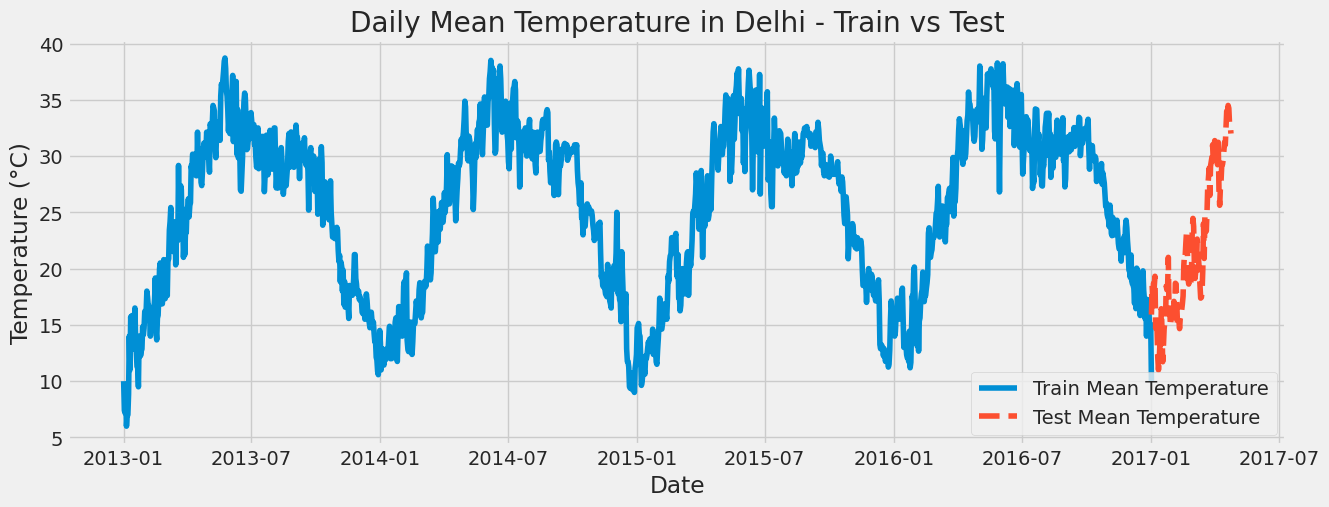

In [ ]:
# Plot mean temperature over time
plt.figure(figsize=(14, 5))
plt.plot(df_train.index, df_train['meantemp'], label='Train Mean Temperature')
plt.plot(df_test.index, df_test['meantemp'], label='Test Mean Temperature', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Daily Mean Temperature in Delhi - Train vs Test')
plt.legend()
plt.show()

In [ ]:
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(df_train[['meantemp']])
test_scaled = scaler.transform(df_test[['meantemp']])

In [ ]:
def create_sequences(data, seq_length=20):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [ ]:
seq_length = 20
X_train, y_train = create_sequences(train_scaled, seq_length)
X_test, y_test = create_sequences(test_scaled, seq_length)

In [ ]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=16, callbacks=[early_stop])

Epoch 1/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.0553
Epoch 2/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0095
Epoch 3/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0088
Epoch 4/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0076
Epoch 5/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0070
Epoch 6/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0067
Epoch 7/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0057
Epoch 8/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0056
Epoch 9/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0056
Epoch 10/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0056
Epoch 11/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0054
Epoch 12/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0050
Epoch 13/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0045
Epoch 14/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0039
Epoch 15/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - lo

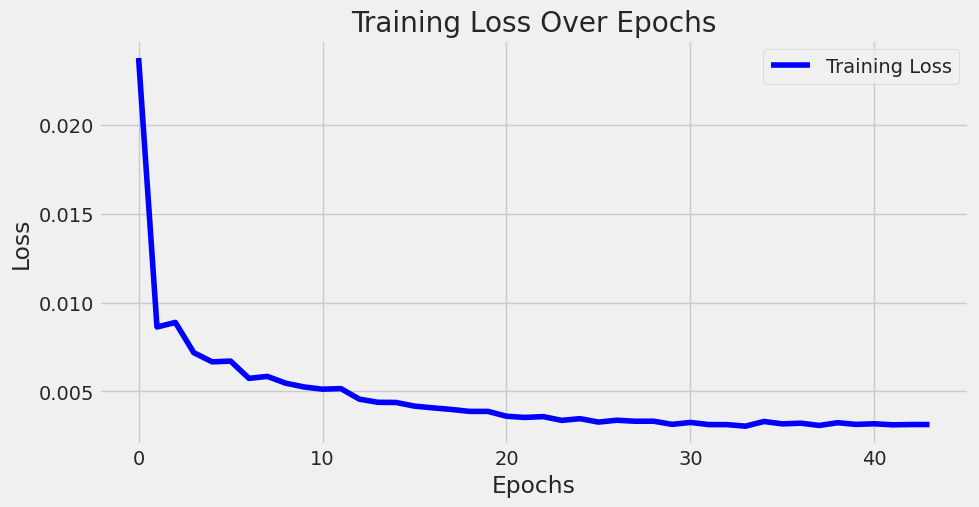

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step


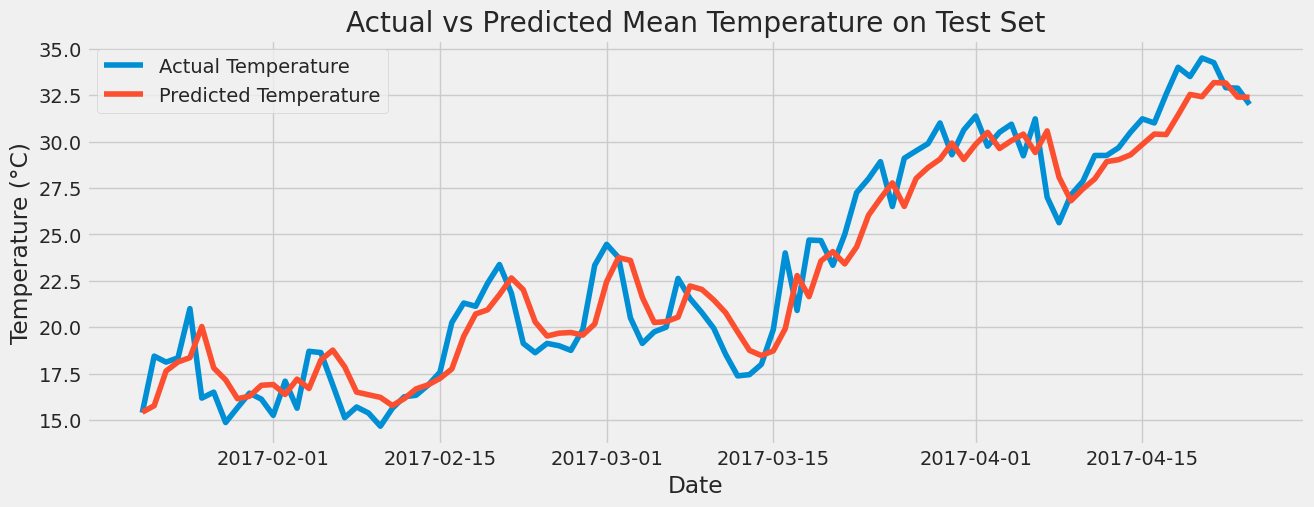

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(df_test.index[seq_length:], y_test_actual, label='Actual Temperature')
plt.plot(df_test.index[seq_length:], predictions, label='Predicted Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Actual vs Predicted Mean Temperature on Test Set')
plt.legend()
plt.show()

In [ ]:
mse = mean_squared_error(y_test_actual, predictions)
mae = mean_absolute_error(y_test_actual, predictions)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 2.808288515840912
Mean Absolute Error: 1.37803490130311


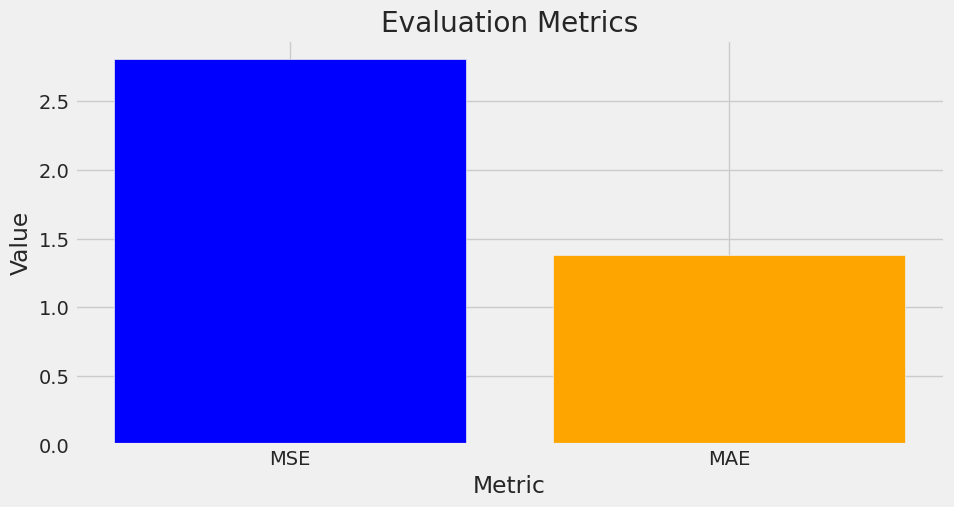

In [ ]:
# Plot evaluation metrics
plt.figure(figsize=(10, 5))
metrics = ['MSE', 'MAE']
values = [mse, mae]
plt.bar(metrics, values, color=['blue', 'orange'])
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Evaluation Metrics')
plt.show()


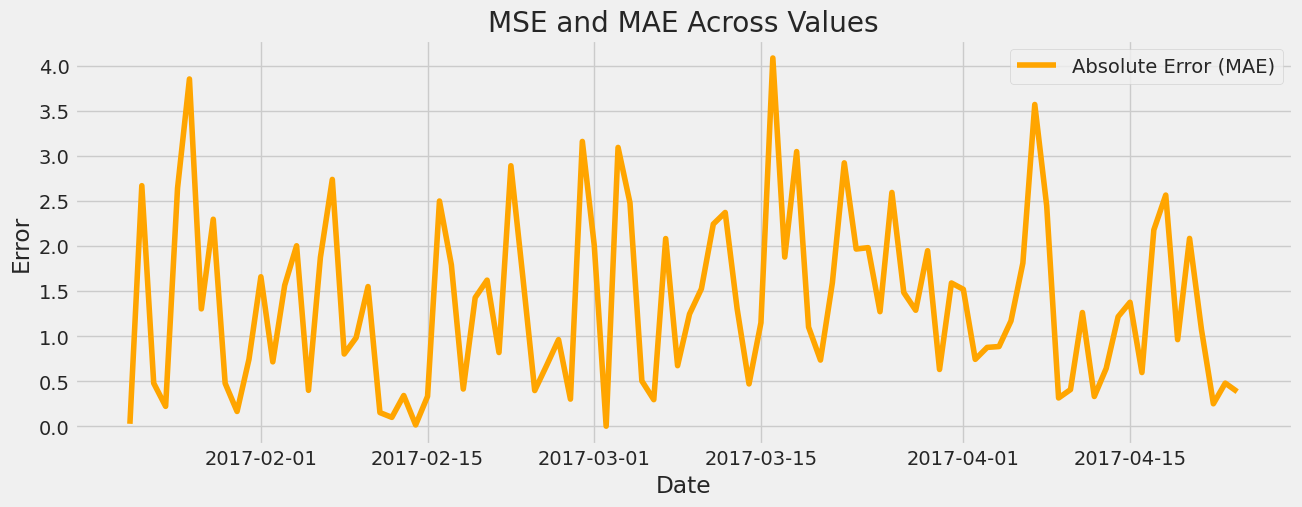

In [ ]:
# Plot MSE and MAE across predictions
plt.figure(figsize=(14, 5))
plt.plot(df_test.index[seq_length:], np.abs(y_test_actual - predictions), label='Absolute Error (MAE)', color='orange')
plt.xlabel('Date')
plt.ylabel('Error')
plt.title('MSE and MAE Across Values')
plt.legend()
plt.show()
